In [1]:
from operator import mod
import numpy as np
import pulse2percept as p2p
from matplotlib import pyplot as plt
from particleSwarm import createSwarm, ps_optimization
from implantHelpers import buildElectrodeArray, numberOfEffectiveElectrodes

import pyswarms as ps
import pyswarms.backend as P
from pyswarms.backend.swarms import Swarm

In [6]:
# Create model and implant
%matplotlib inline
implant = p2p.implants.ArgusII()
model = p2p.models.AxonMapModel(xrange= (-2.5, 2), yrange= (-2,2), xystep= 0.02, rho=75) 
model.build()

init_effective = numberOfEffectiveElectrodes(implant=implant, model=model)
print(f"Inital Number of Effective Electrodes: {init_effective}")

# Bounds 
search_params = {
    'a': (-2500, 2000),
    'b': (-2000, 2000)
}
lb = [v[0] for v in search_params.values()]
ub = [v[1] for v in search_params.values()]

bounds = (lb, ub)

# Create swarm
swarm = createSwarm(implant)
radius = implant[0].r
iterations = 100

Inital Number of Effective Electrodes: 10


In [3]:
# Maximize number of effective electrodes
best_positions, best_cost = ps_optimization(swarm=swarm, iterations=iterations, bounds=bounds, model=model, electrode_radius=radius)

[Iteration 0] Best Cost: 50
[Iteration 10] Best Cost: 47
[Iteration 20] Best Cost: 47
[Iteration 30] Best Cost: 46
[Iteration 40] Best Cost: 46
[Iteration 50] Best Cost: 46
[Iteration 60] Best Cost: 46
[Iteration 70] Best Cost: 46
[Iteration 80] Best Cost: 46
[Iteration 90] Best Cost: 46


Best Cost: inf
New Number of Effective Electrodes: -inf
Increase in Effective Electrodes: -inf


<AxesSubplot:xlabel='x (microns)', ylabel='y (microns)'>

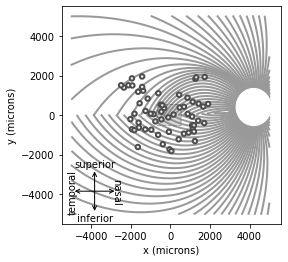

In [7]:
optimized_effective = implant.n_electrodes - swarm.best_cost
increase_effective = optimized_effective - init_effective
print(f'Best Cost: {swarm.best_cost}')
print(f'New Number of Effective Electrodes: {optimized_effective}')

print(f'Increase in Effective Electrodes: {increase_effective}')

optimized_implant = buildElectrodeArray(best_positions, radius)
model.plot()
optimized_implant.plot()